**Covid 19 trend Analysis and Forecasting Project**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=True)

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
#Renaming the columns
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [5]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [8]:
df["active"]

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [9]:
# Visually  analysing the trends

In [10]:
df["date"].max()

'2020-07-27'

In [11]:
#countries having most active cases in any particular date
recent_day = df[df["date"]== "2020-07-27"]
recent_day

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [12]:
world = recent_day.groupby("country")["confirmed","active","deaths","recovered"].sum().reset_index()
world

<ipython-input-12-df3eb7ace86b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = recent_day.groupby("country")["confirmed","active","deaths","recovered"].sum().reset_index()


,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [15]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Active Cases")
figure.show()

In [16]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="confirmed",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Confirmed Cases")
figure.show()

<ipython-input-17-bf21486e4dd3>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-17-bf21486e4dd3>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

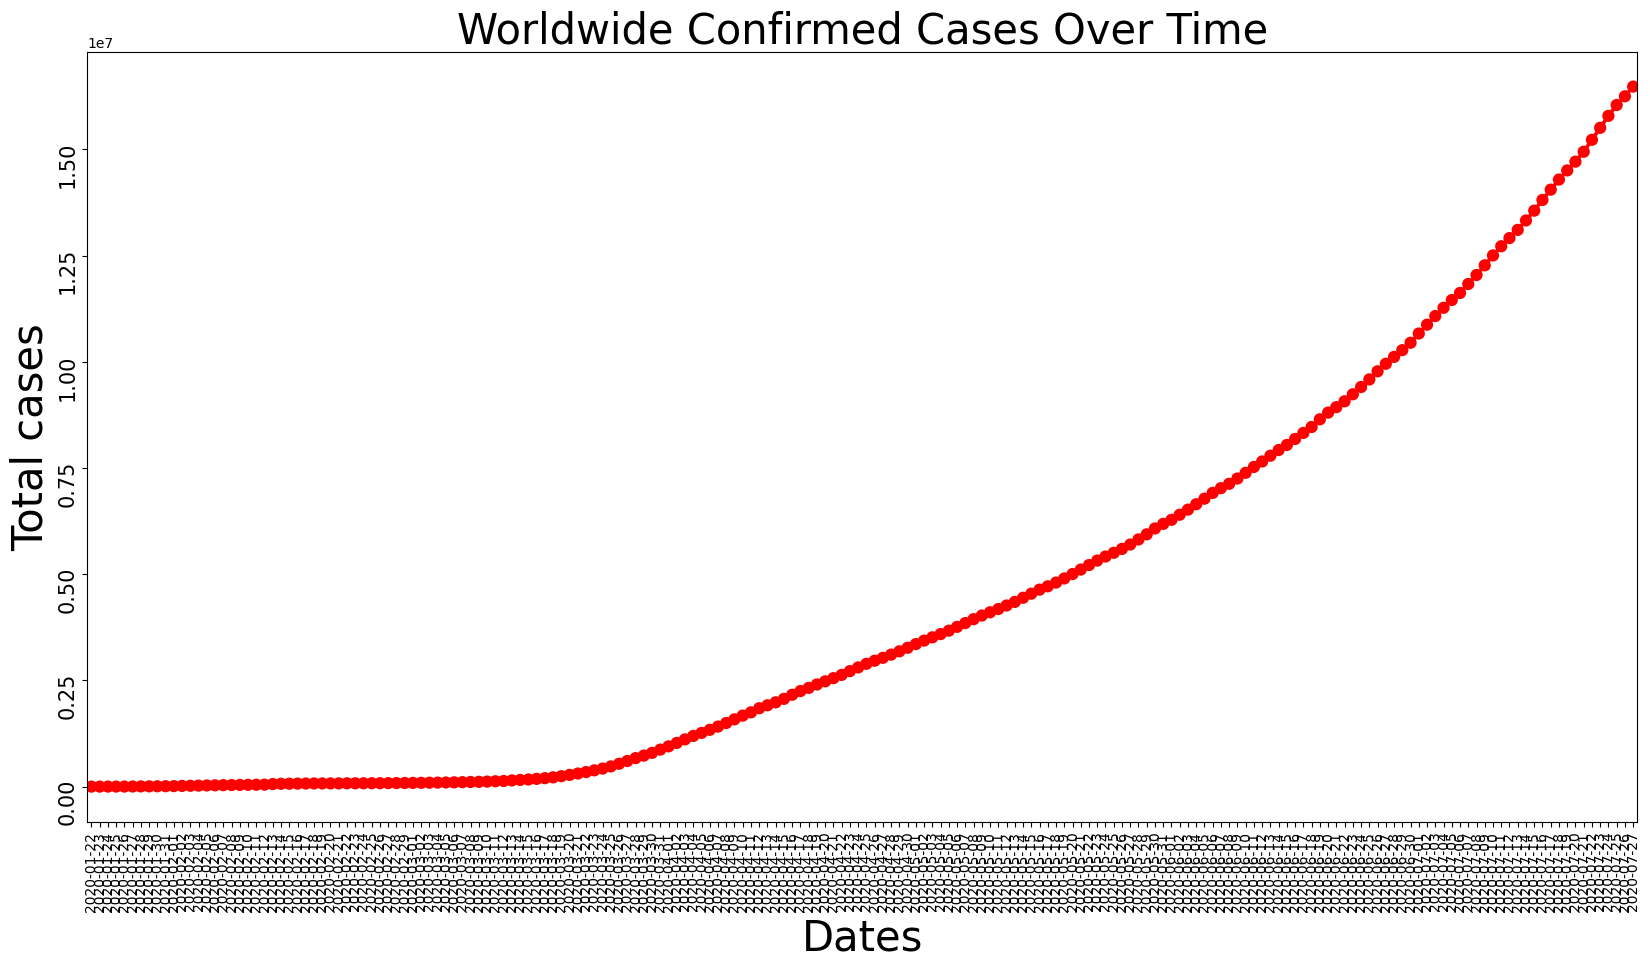

In [17]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

<ipython-input-18-d6290f710705>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-d6290f710705>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

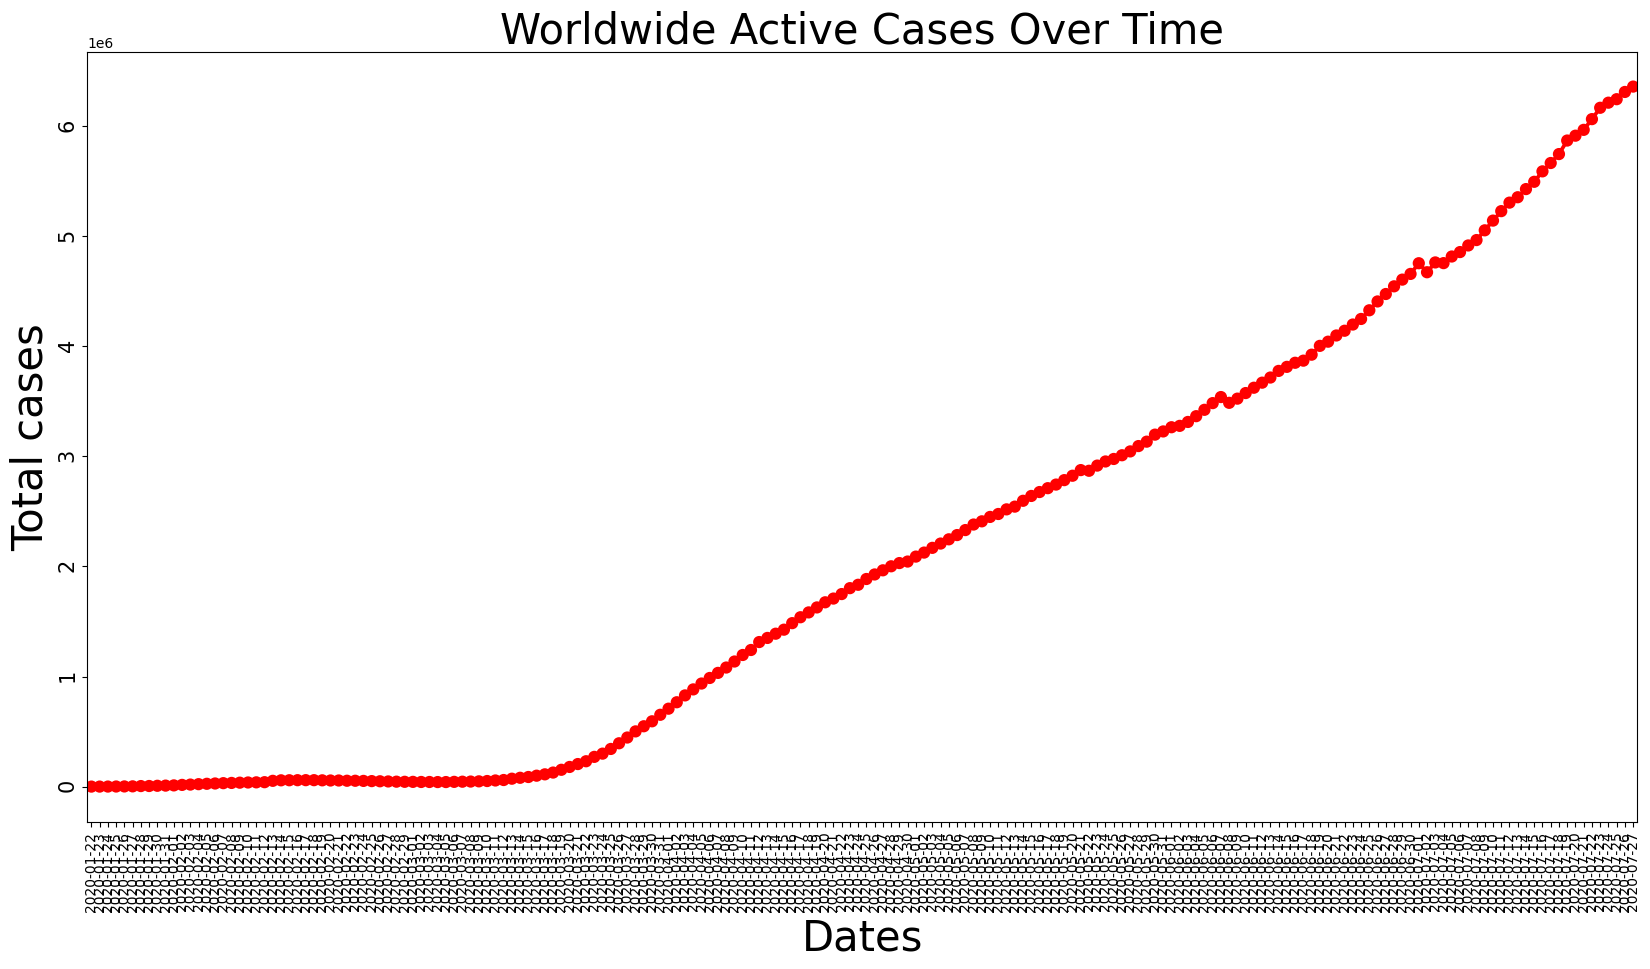

In [18]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Active Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','active'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.active, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [ ]:
# visual with recover and death cases

<ipython-input-21-5f9770545ecf>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-21-5f9770545ecf>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

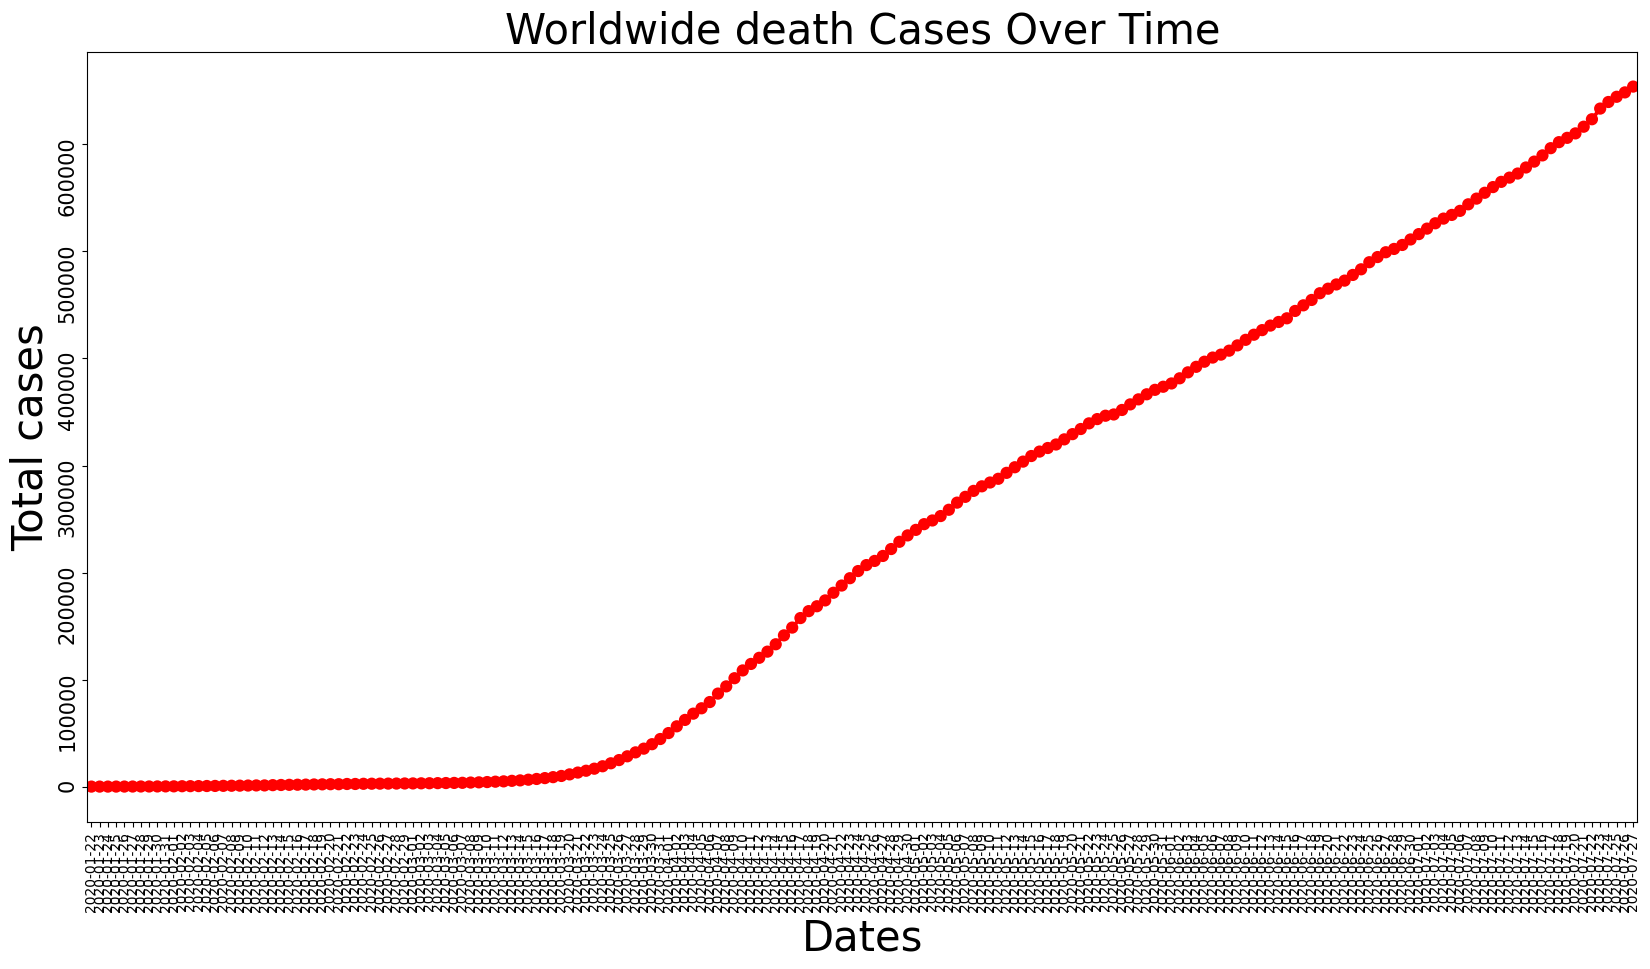

In [21]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide death Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','deaths'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.deaths, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

<ipython-input-22-7f5931a5ddd9>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-22-7f5931a5ddd9>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

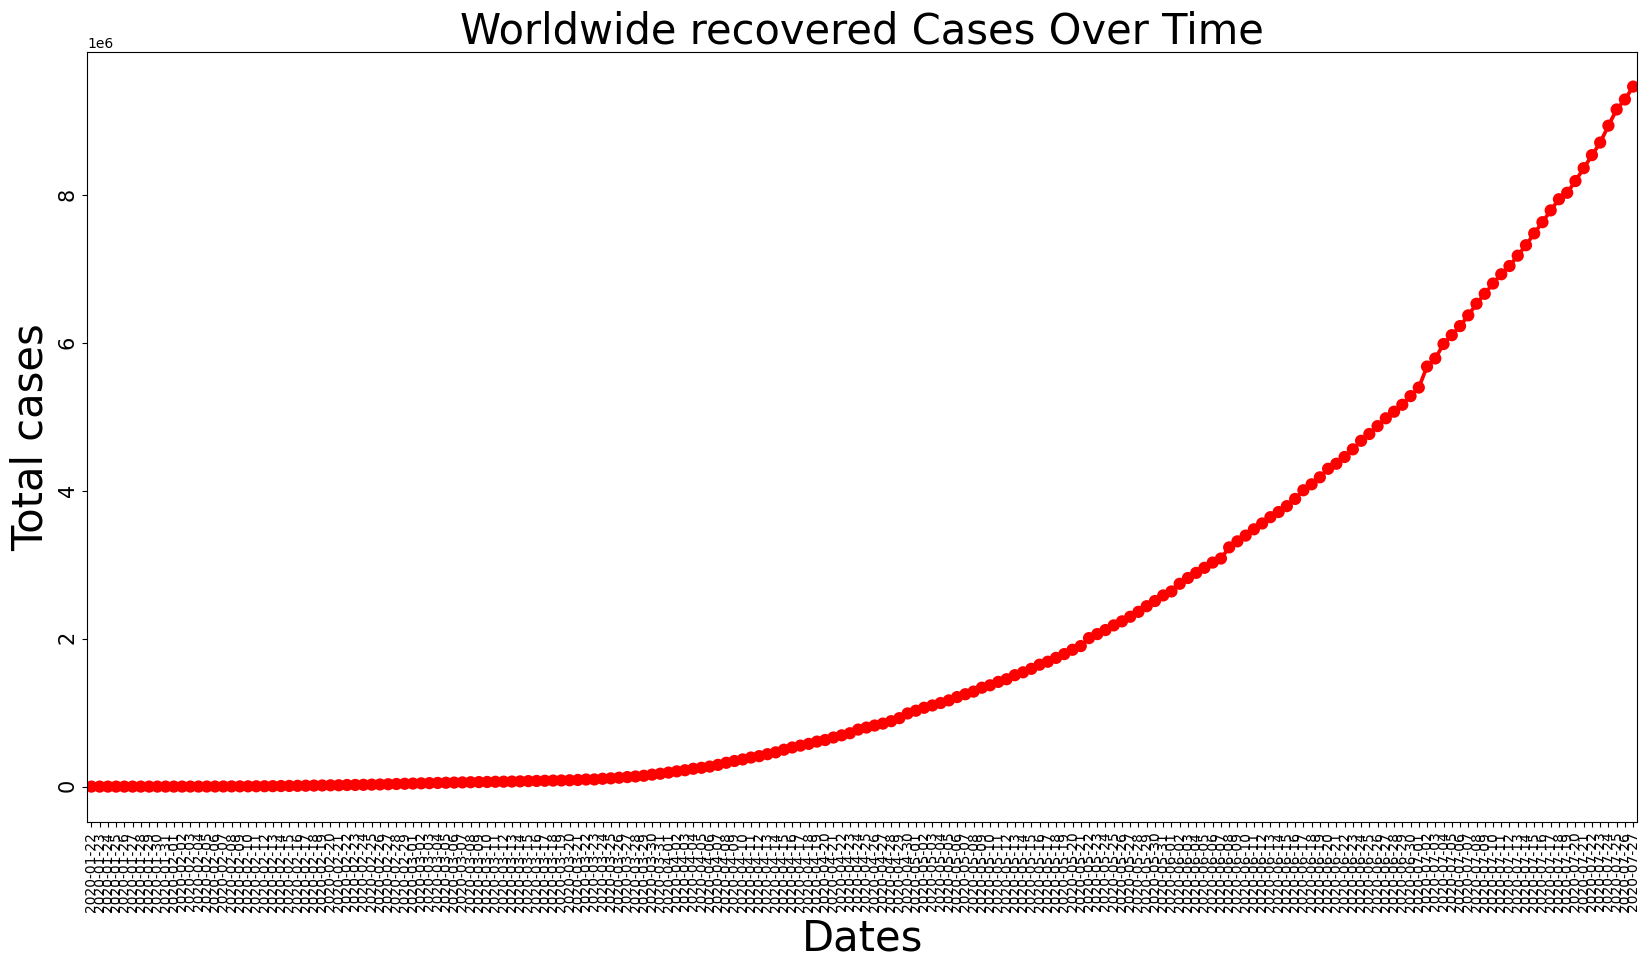

In [22]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide recovered Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','recovered'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.recovered, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [ ]:
# Top 10 countries with highest active cases in the most recent day

In [23]:
top_actives = recent_day.groupby(by="country")["active"].sum().sort_values(ascending=False).head(10).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

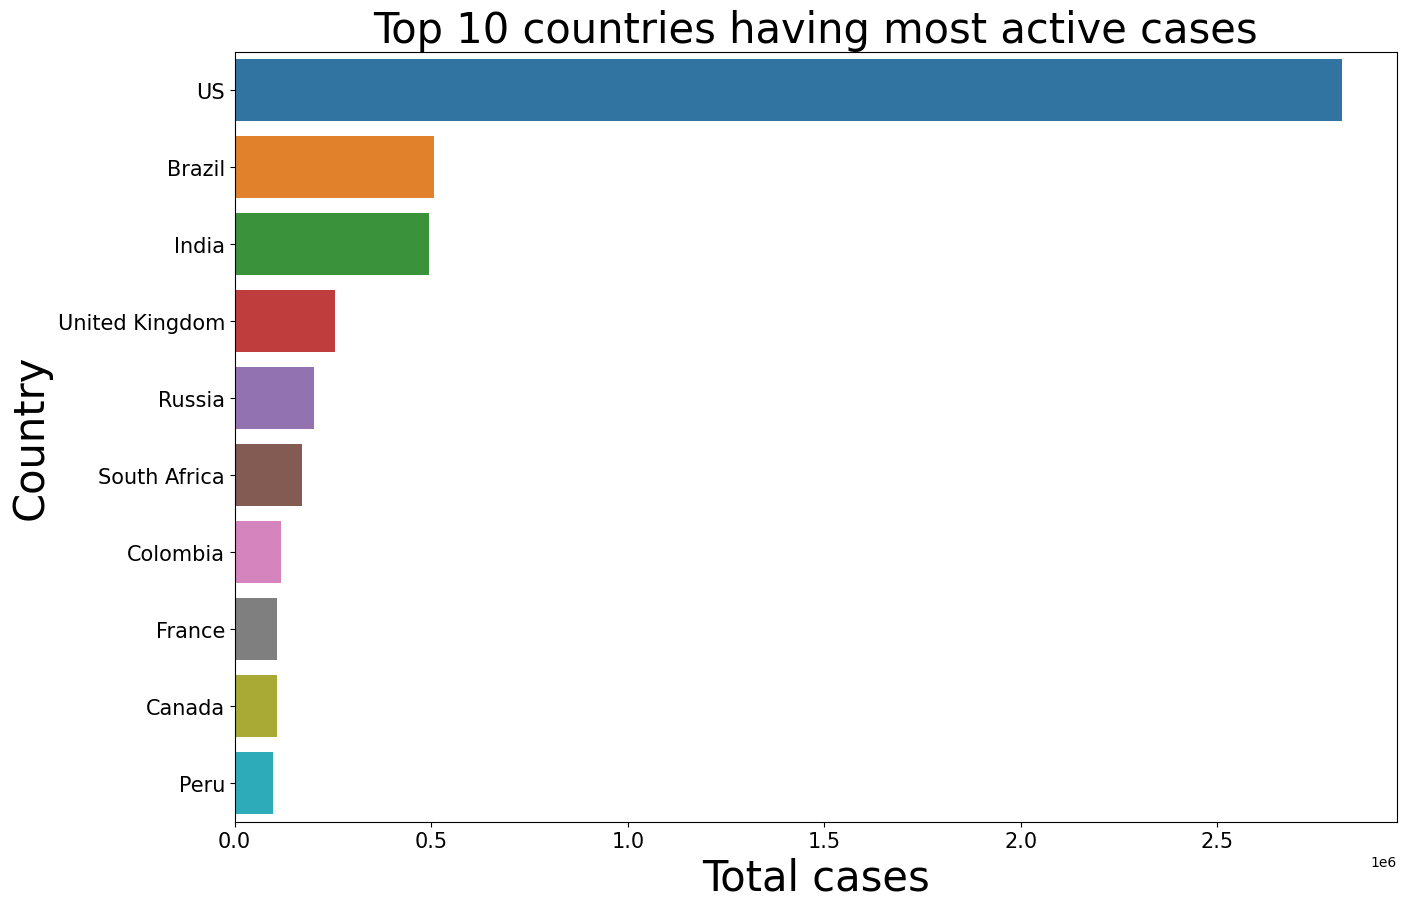

In [24]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [ ]:
# Top 10 countries with highest death cases in the most recent day

In [25]:
top_deaths = recent_day.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(10).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

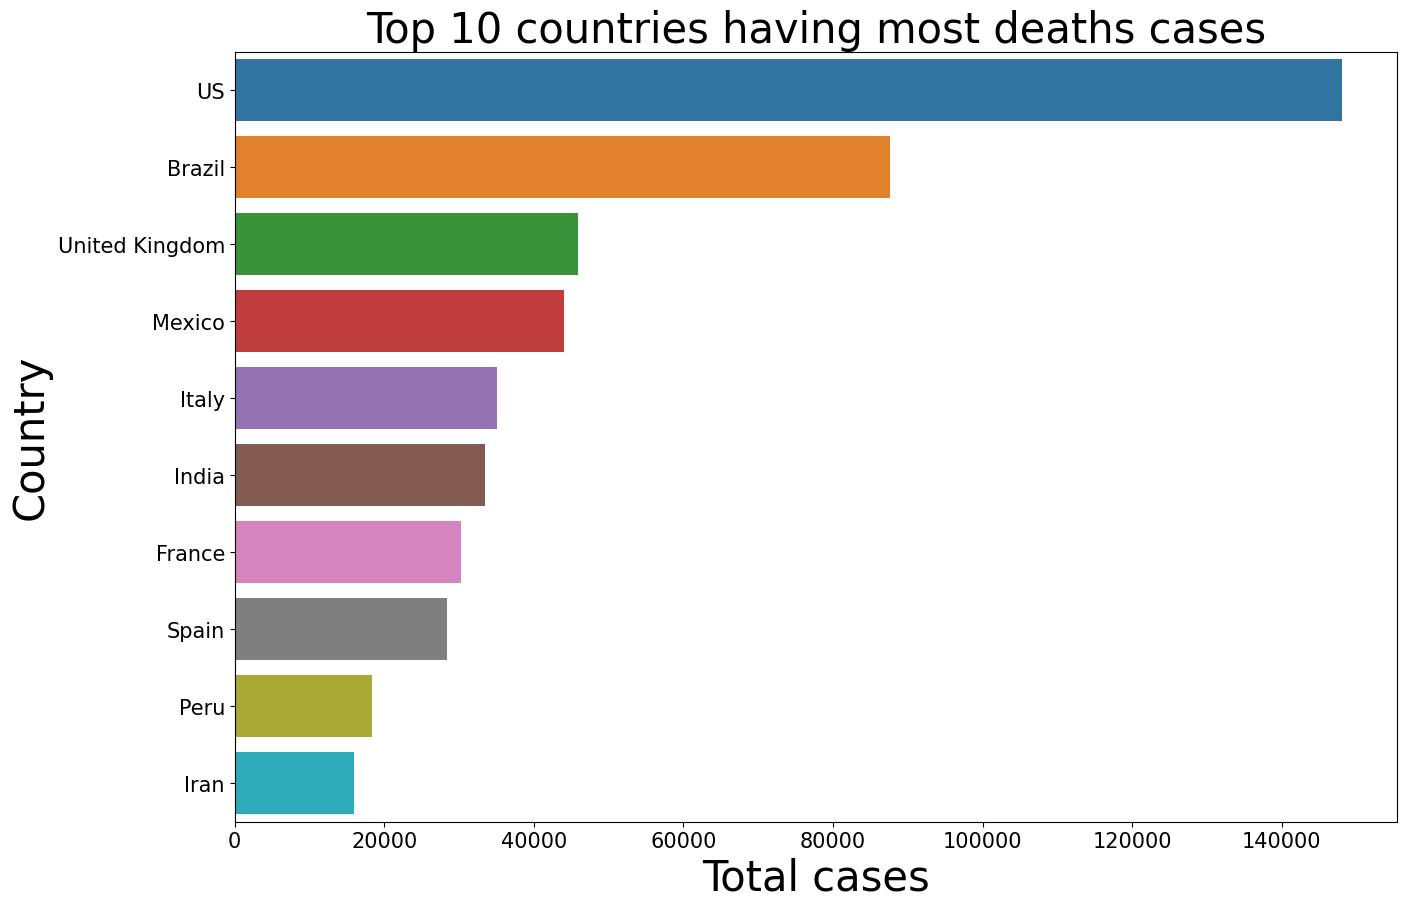

In [26]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most deaths cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [27]:
top_deaths = recent_day.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(10).reset_index()
top_deaths

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

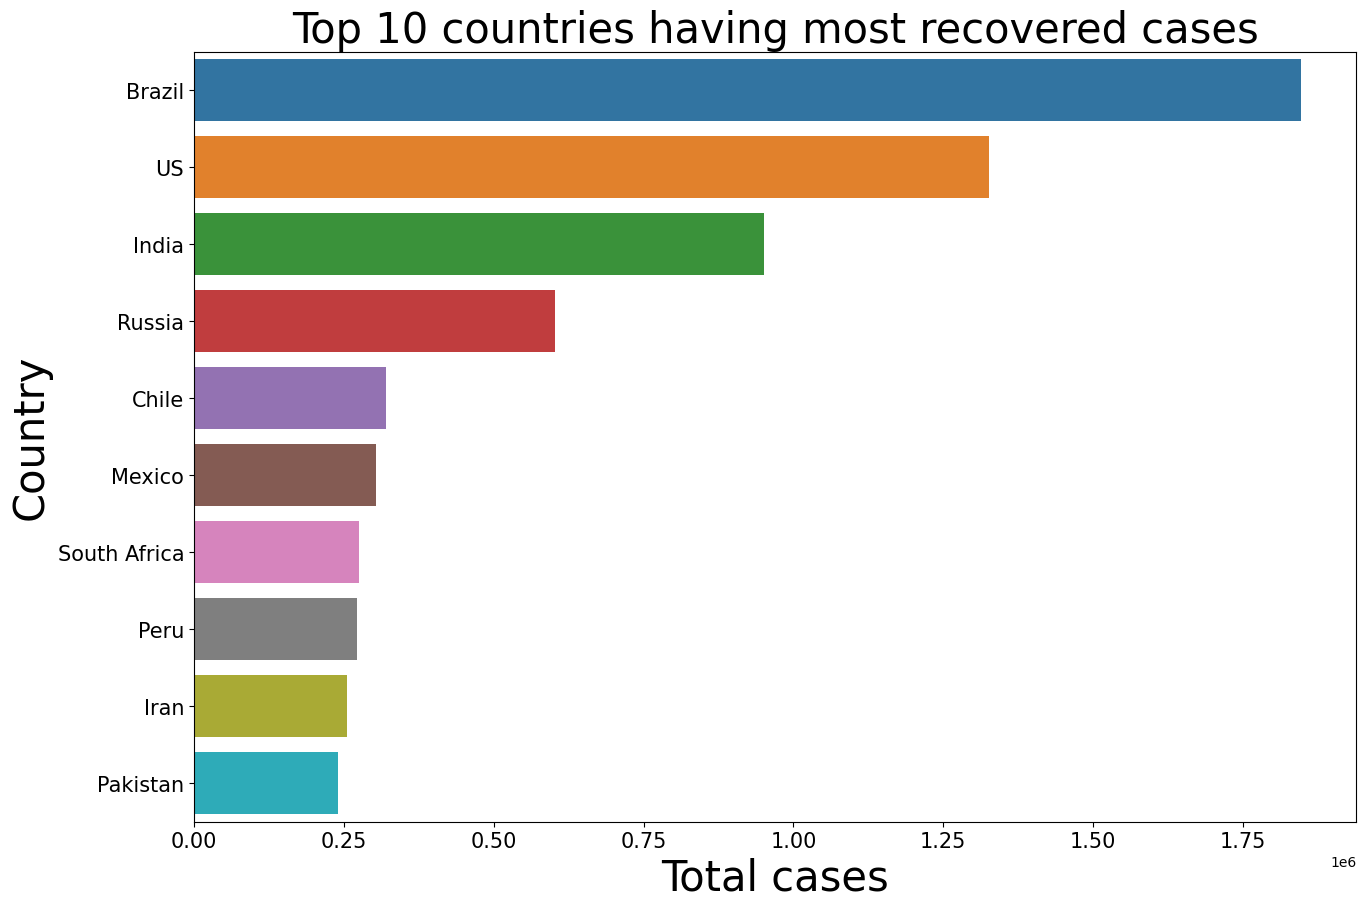

In [28]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=top_deaths.recovered, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [29]:
top_deaths = recent_day.groupby(by="country")["confirmed"].sum().sort_values(ascending=False).head(10).reset_index()
top_deaths

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

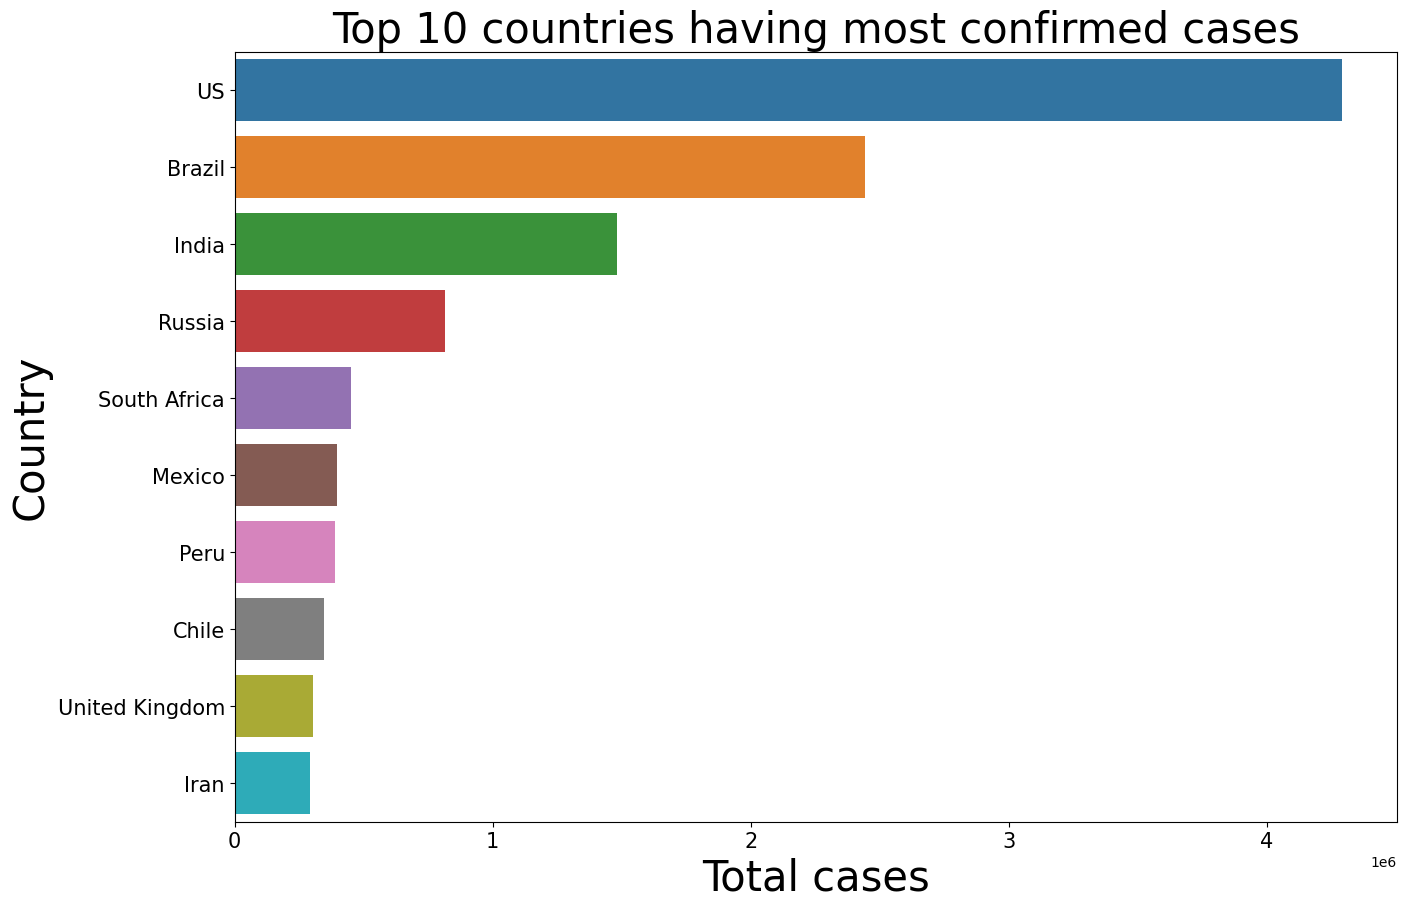

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most confirmed cases",fontsize=30)
ax = sns.barplot(x=top_deaths.confirmed, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [32]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil

<ipython-input-32-37ea4555b911>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [33]:
UK = df[df.country == "United Kingdom"]
UK = UK.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
UK

<ipython-input-33-e0f1d8d33139>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [34]:
India = df[df.country == "India"]
India = India.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
India

<ipython-input-34-6307cd9f1d75>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


In [35]:
US = df[df.country == "US"]
US = US.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
US

<ipython-input-35-d1f45acdc34d>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [36]:
russia = df[df.country == "Russia"]
russia = russia.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
russia

<ipython-input-36-39e3e0c5a49e>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [ ]:
# lets compare the trend of confirmed cases

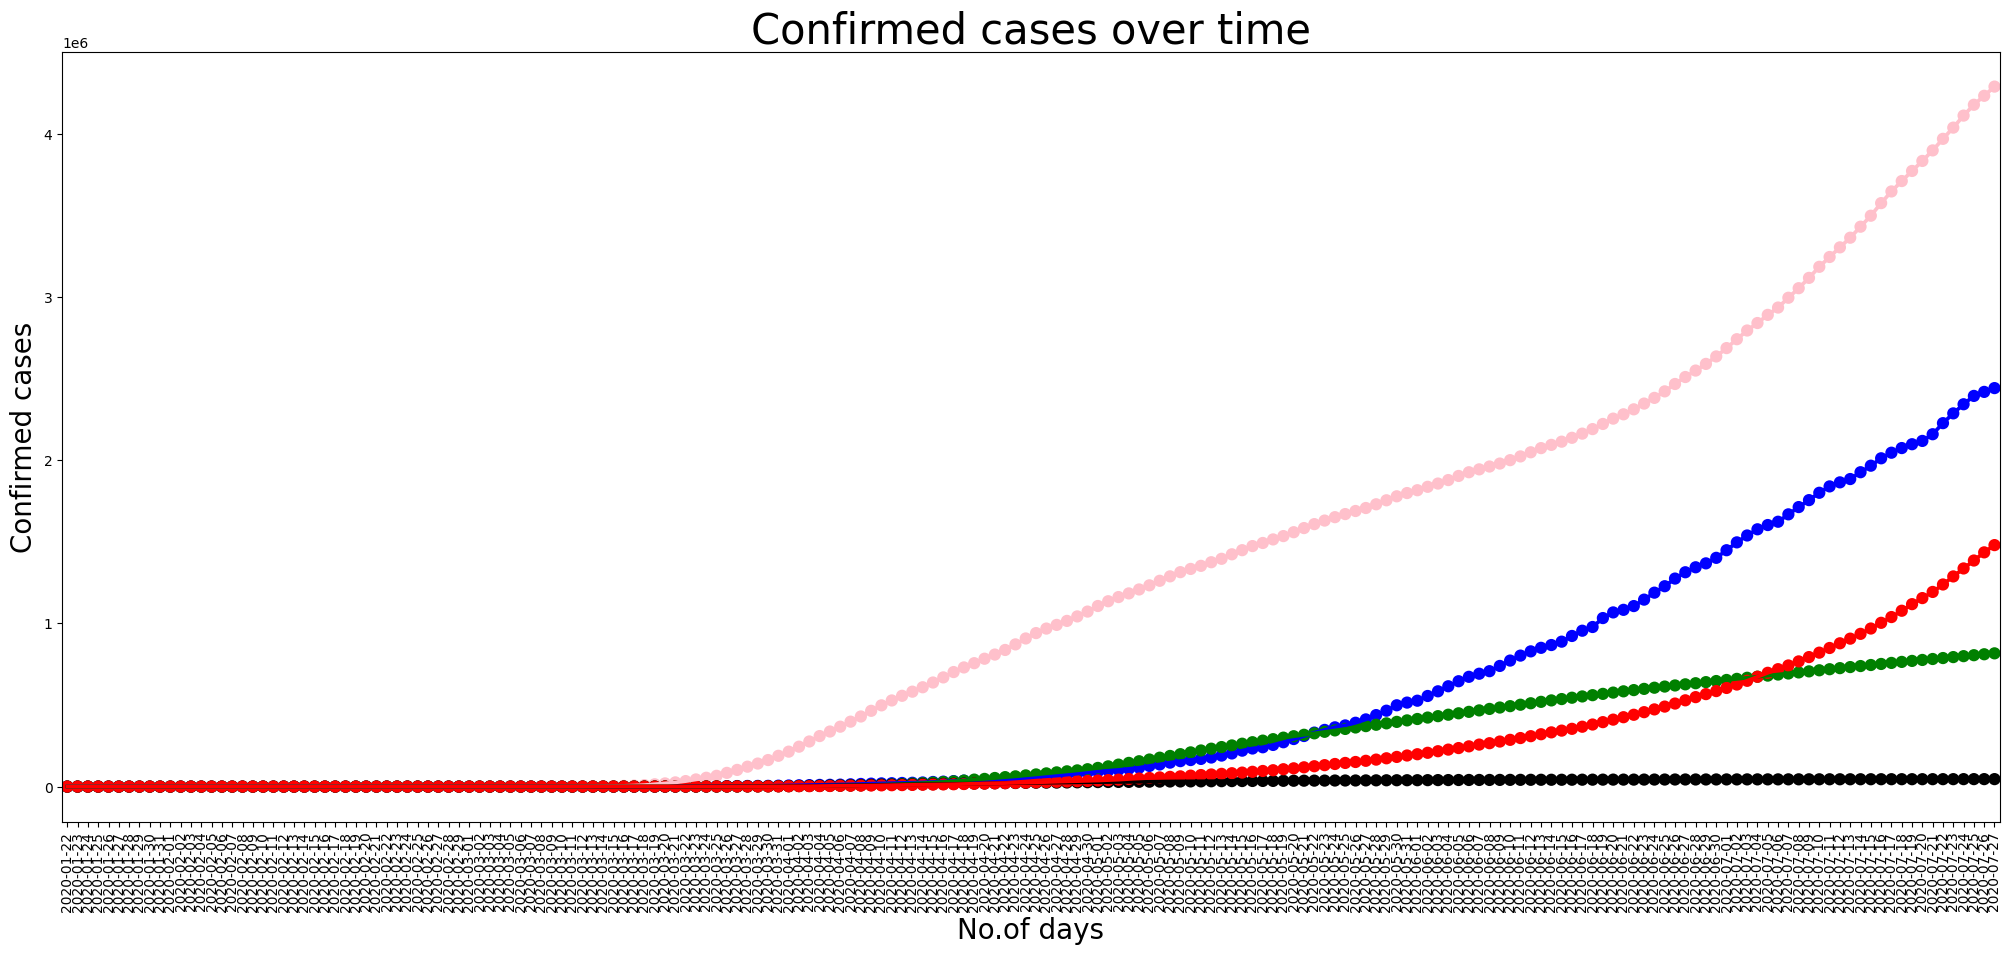

In [37]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.confirmed,color="Blue")
sns.pointplot(x=US.date,y=US.confirmed,color="Pink")
sns.pointplot(x=russia.date,y=russia.confirmed,color="Green")
sns.pointplot(x=UK.date,y=UK.deaths,color="black")
sns.pointplot(x=India.date,y=India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

In [ ]:
#analysis for death, active,recovered

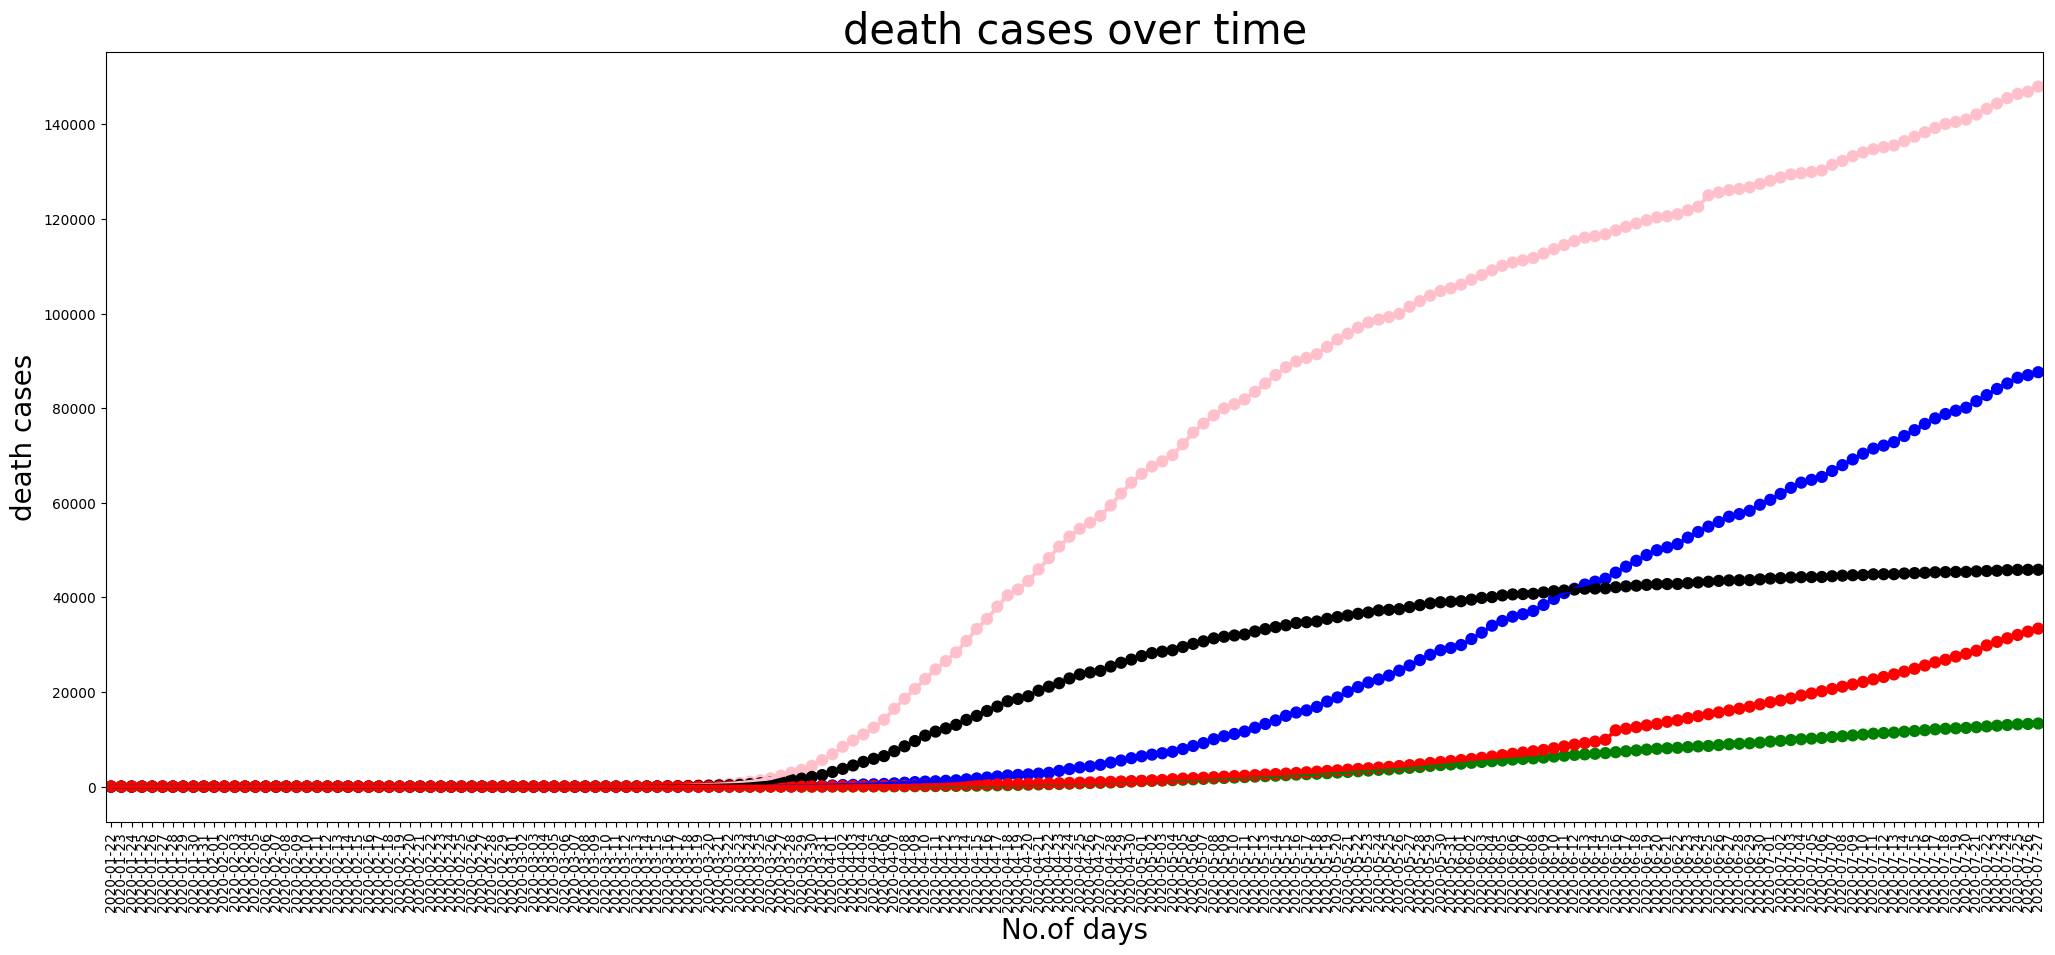

In [40]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.deaths,color="Blue")
sns.pointplot(x=US.date,y=US.deaths,color="Pink")
sns.pointplot(x=russia.date,y=russia.deaths,color="Green")
sns.pointplot(x=UK.date,y=UK.deaths,color="black")
sns.pointplot(x=India.date,y=India.deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('death cases',fontsize=20)
plt.title('death cases over time',fontsize=30)
plt.show()

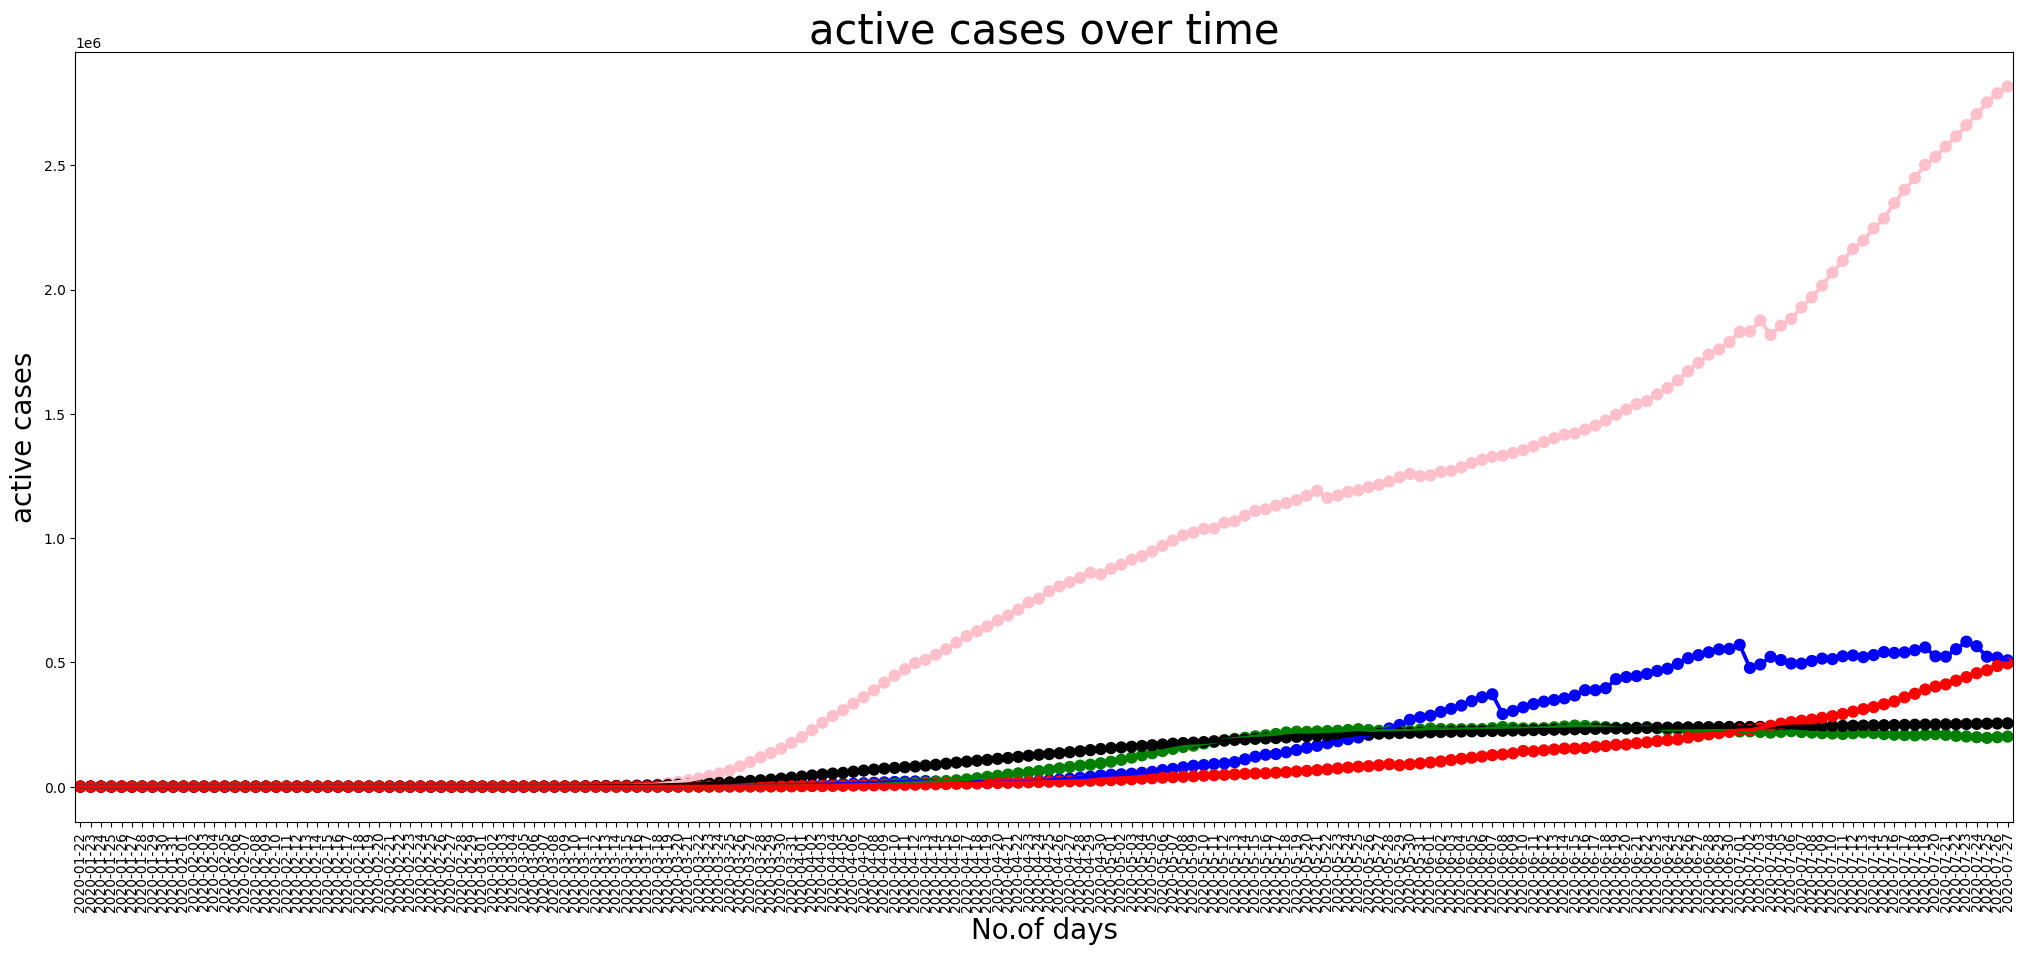

In [41]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.active,color="Blue")
sns.pointplot(x=US.date,y=US.active,color="Pink")
sns.pointplot(x=russia.date,y=russia.active,color="Green")
sns.pointplot(x=UK.date,y=UK.active,color="black")
sns.pointplot(x=India.date,y=India.active,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('active cases',fontsize=20)
plt.title('active cases over time',fontsize=30)
plt.show()

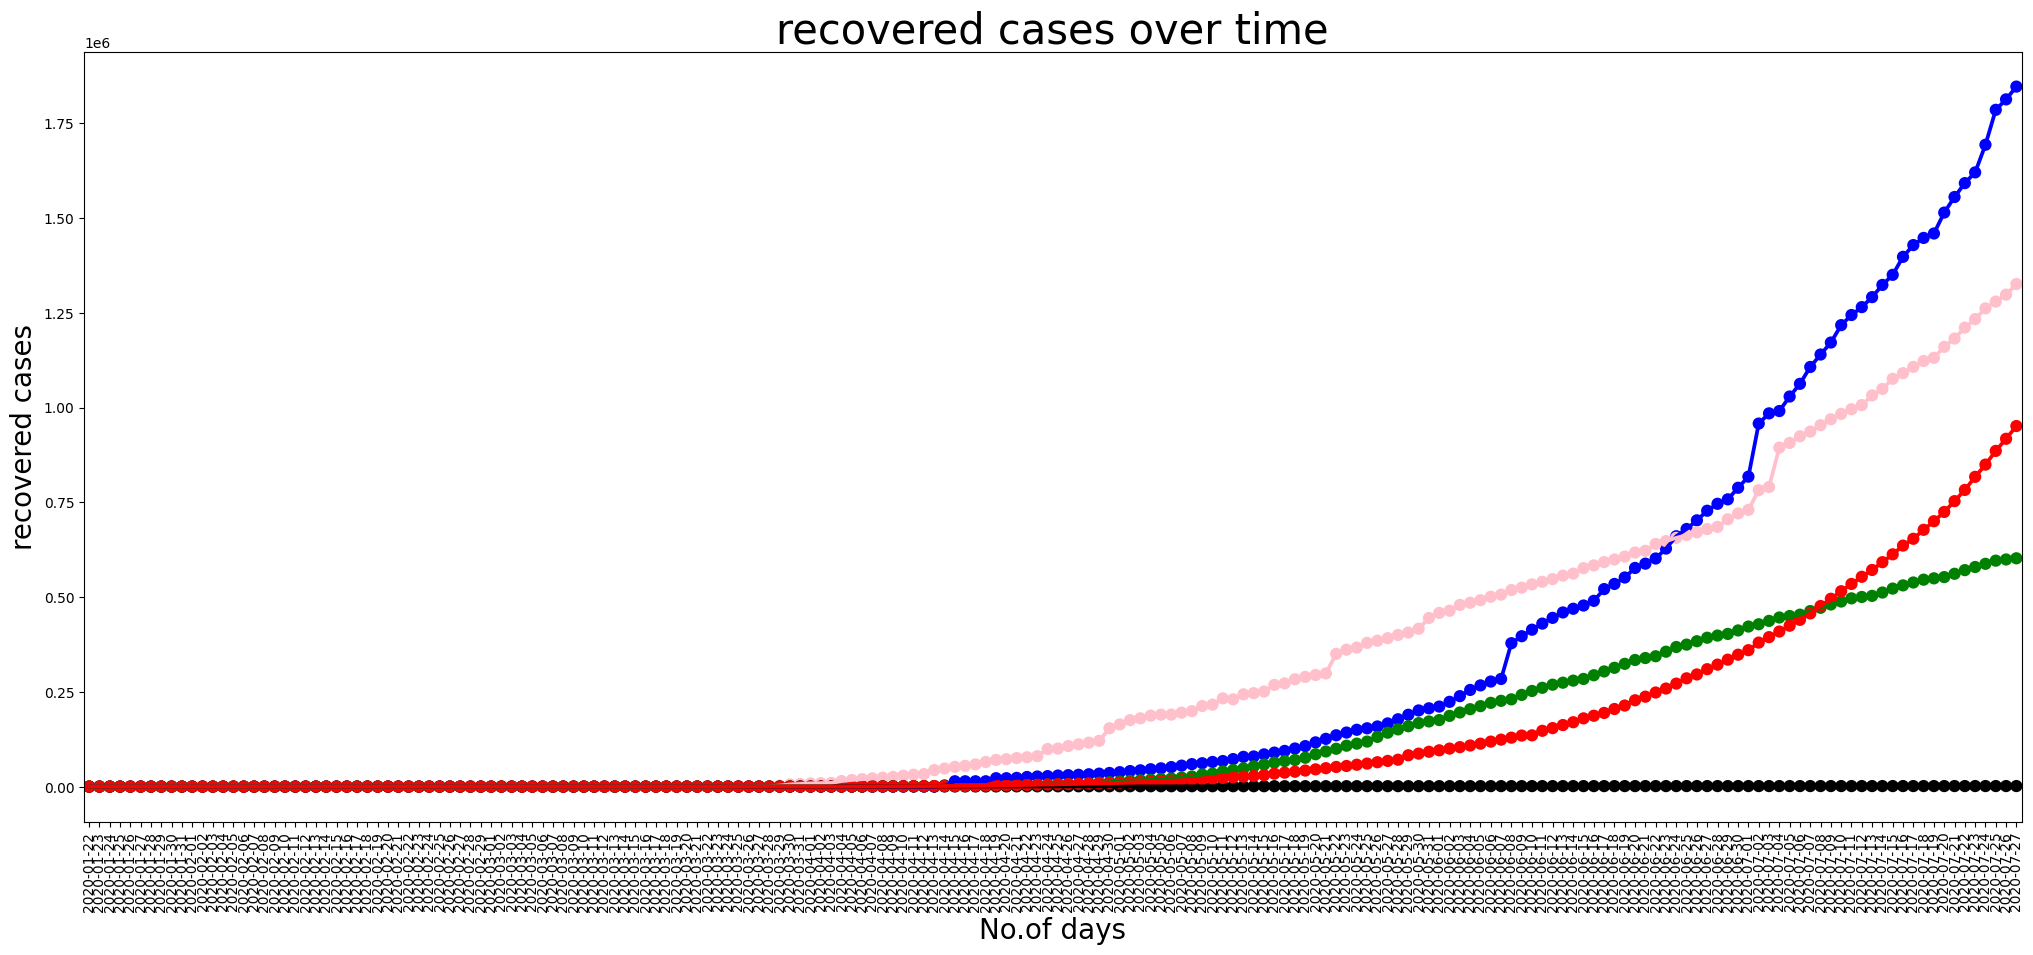

In [42]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.recovered,color="Blue")
sns.pointplot(x=US.date,y=US.recovered,color="Pink")
sns.pointplot(x=russia.date,y=russia.recovered,color="Green")
sns.pointplot(x=UK.date,y=UK.recovered,color="black")
sns.pointplot(x=India.date,y=India.recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('recovered cases',fontsize=20)
plt.title('recovered cases over time',fontsize=30)
plt.show()

In [ ]:
#DONE WITH ANALYSIS PART

In [ ]:
#FORECASTING -- fb prophet Algorithm

# Forecasting





In [43]:
!pip install prophet

In [44]:
from prophet import Prophet

In [45]:
df   # unchanged data

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [47]:
Confirmed=df.groupby('date').sum()['confirmed'].reset_index()
Deaths=df.groupby('date').sum()['deaths'].reset_index()
Recovered=df.groupby('date').sum()['recovered'].reset_index()
Active=df.groupby('date').sum()['Active'].reset_index()


<ipython-input-47-3f2037206128>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-3f2037206128>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-3f2037206128>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-3f2037206128>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

In [48]:
Confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [49]:
Active

,date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [50]:
Deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [51]:
Recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [52]:
# lets do forecasting for confirmed cases

# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'

In [53]:
Confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [54]:
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [55]:
model=Prophet(interval_width=0.95)

In [56]:
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dbosw8g/nzjb3kb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8dbosw8g/vbxj90a1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63920', 'data', 'file=/tmp/tmp8dbosw8g/nzjb3kb_.json', 'init=/tmp/tmp8dbosw8g/vbxj90a1.json', 'output', 'file=/tmp/tmp8dbosw8g/prophet_model6l759m7j/prophet_model-20240116114615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future=model.make_future_dataframe(periods=7) # period can be altered based on the business requirement

In [59]:
future.tail(10)

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [60]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.615111e+07,1.648667e+07
189,2020-07-29,1.652997e+07,1.638005e+07,1.668844e+07
190,2020-07-30,1.674391e+07,1.658142e+07,1.691243e+07
191,2020-07-31,1.695910e+07,1.679741e+07,1.712011e+07
192,2020-08-01,1.716676e+07,1.699122e+07,1.733186e+07
193,2020-08-02,1.736430e+07,1.718096e+07,1.753721e+07
194,2020-08-03,1.755889e+07,1.738852e+07,1.774824e+07


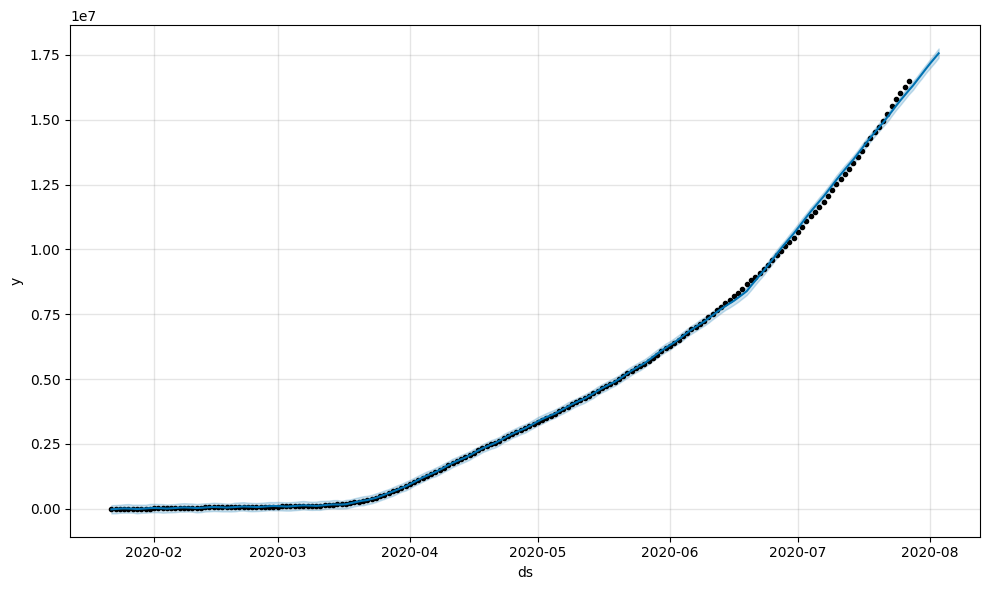

In [61]:
confirmed_forecast_plot = model.plot(forecast)

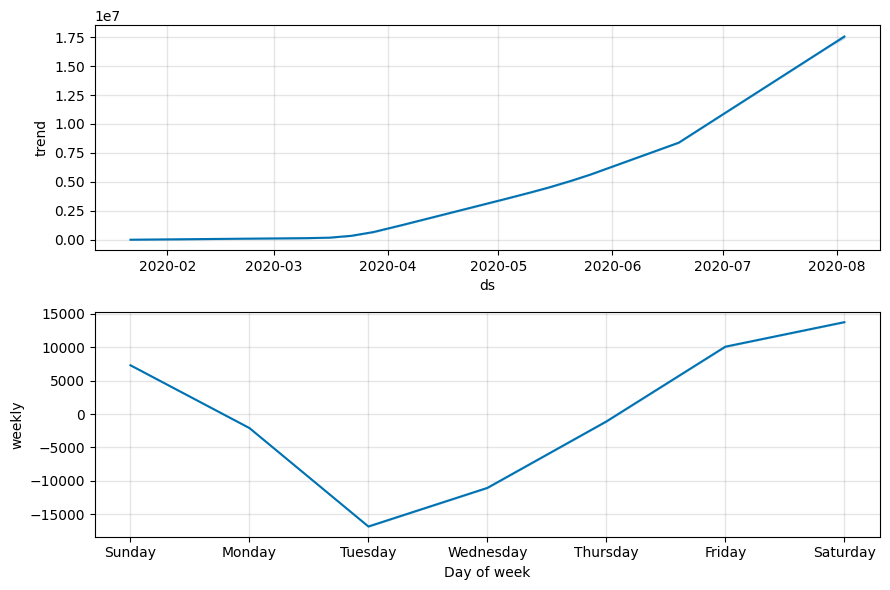

In [62]:
confirmed_forecast_plot1 = model.plot_components(forecast)

Forecasting for 7 days have been completed